In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF

In [28]:
zl_report_all=pd.read_csv(r"C:\TM1py\zl_amazon_payments_data_report.csv")

In [29]:
zl_report_all

,Scenario,SA Year,SA Month,Version,COA Company,Currency,Country,Product,Platform,ZL Amazon Management Report Item,Data Source Payments Data Report,M ZL Amazon Payments Data Report,Value
0,ACT,2018,M01,WIP,2,USD,US,LSKU1787,7,AMZ SP广告费分摊,Base,Amount,278.9424
1,ACT,2018,M01,WIP,2,USD,US,LSKU1787,7,AMZ SD广告费分摊,Base,Amount,43.1232
2,ACT,2018,M01,WIP,2,USD,US,LSKU1284,7,AMZ SP广告费分摊,Base,Amount,161.3496
3,ACT,2018,M01,WIP,2,USD,US,LSKU1284,7,AMZ SD广告费分摊,Base,Amount,0.2784
4,ACT,2018,M01,WIP,2,USD,US,LSKU1931,7,AMZ SP广告费分摊,Base,Amount,79.6800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706997,Forecast,2021,M12,WIP,2,No Currency,SE,LSKU1179,5,销售数量(不含退货),Base,Amount,1.0000
6706998,Forecast,2021,M12,WIP,2,No Currency,SE,LSKU1904,5,退货数量,Base,Amount,-1.0000
6706999,Forecast,2021,M12,WIP,2,No Currency,SE,LSKU1303,5,销售数量(不含退货),Base,Amount,1.0000
6707000,Forecast,2021,M12,WIP,2,No Currency,TR,LSKU1929,6,销售数量(不含退货),Base,Amount,1.0000


#### 筛选ACT数据中的销售数量并转换为时间序列

In [30]:
def generate_timeseries(df:'pd.DataFrame'):
    df_act=df[(df["Scenario"]=='ACT')&(df["ZL Amazon Management Report Item"]=="销售数量(不含退货)")]
    #日期处理
    df_act.loc[:,"SA Year"]=df_act["SA Year"].astype("str")
    df_act.loc[:,"yearmonth"]=df_act["SA Year"]+'-'+df_act["SA Month"].str.slice(1,3)
    df_act.loc[:,"yearmonth"]=pd.to_datetime(df_act["yearmonth"])
    timeseries=df_act.groupby("yearmonth")["Value"].sum()
    return timeseries

In [31]:
timeseries=generate_timeseries(zl_report_all)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [32]:
timeseries

yearmonth
2018-01-01     50378.0
2018-02-01     44338.0
2018-03-01     39846.0
2018-04-01     39418.0
2018-05-01     65978.0
2018-06-01     49436.0
2018-07-01     55310.0
2018-08-01     47286.0
2018-09-01     34064.0
2018-10-01     33538.0
2018-11-01     53328.0
2018-12-01    113544.0
2019-01-01     46916.0
2019-02-01     48016.0
2019-03-01     44968.0
2019-04-01     56788.0
2019-05-01     72704.0
2019-06-01     68478.0
2019-07-01     70376.0
2019-08-01     60460.0
2019-09-01     66152.0
2019-10-01     64344.0
2019-11-01     88596.0
2019-12-01    191508.0
2020-01-01     70190.0
2020-02-01     58234.0
2020-03-01     67362.0
2020-04-01    121244.0
2020-05-01    190848.0
2020-06-01    180362.0
2020-07-01    201000.0
2020-08-01    224192.0
2020-09-01    214426.0
2020-10-01    253198.0
2020-11-01    328624.0
2020-12-01    597592.0
2021-01-01    272982.0
2021-02-01    231742.0
2021-03-01    262670.0
2021-04-01    254064.0
2021-05-01    317472.0
2021-06-01    251990.0
2021-07-01    201108.0
2

### 时间序列分解

In [33]:
decomposition = seasonal_decompose(timeseries,extrapolate_trend="freq",model="multilicative")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [9]:
trend

yearmonth
2018-01-01     40305.164336
2018-02-01     41818.633741
2018-03-01     43332.103147
2018-04-01     44845.572552
2018-05-01     46359.041958
2018-06-01     47872.511364
2018-07-01     52061.083333
2018-08-01     52070.083333
2018-09-01     52436.750000
2018-10-01     53373.916667
2018-11-01     54377.916667
2018-12-01     55451.583333
2019-01-01     56872.750000
2019-02-01     58049.416667
2019-03-01     59935.333333
2019-04-01     62555.916667
2019-05-01     65309.000000
2019-06-01     70027.000000
2019-07-01     74245.250000
2019-08-01     75640.750000
2019-09-01     76999.583333
2019-10-01     80618.333333
2019-11-01     88226.666667
2019-12-01     97811.166667
2020-01-01    107915.666667
2020-02-01    120180.500000
2020-03-01    133180.750000
2020-04-01    147227.750000
2020-05-01    165097.833333
2020-06-01    192019.166667
2020-07-01    217389.000000
2020-08-01    233068.166667
2020-09-01    248435.500000
2020-10-01    262107.500000
2020-11-01    272917.666667
2020-12-01

In [10]:
seasonal

yearmonth
2018-01-01    0.945956
2018-02-01    0.817562
2018-03-01    0.794009
2018-04-01    0.897873
2018-05-01    1.233918
2018-06-01    0.988902
2018-07-01    0.914299
2018-08-01    0.872394
2018-09-01    0.783439
2018-10-01    0.791293
2018-11-01    1.044177
2018-12-01    1.916179
2019-01-01    0.945956
2019-02-01    0.817562
2019-03-01    0.794009
2019-04-01    0.897873
2019-05-01    1.233918
2019-06-01    0.988902
2019-07-01    0.914299
2019-08-01    0.872394
2019-09-01    0.783439
2019-10-01    0.791293
2019-11-01    1.044177
2019-12-01    1.916179
2020-01-01    0.945956
2020-02-01    0.817562
2020-03-01    0.794009
2020-04-01    0.897873
2020-05-01    1.233918
2020-06-01    0.988902
2020-07-01    0.914299
2020-08-01    0.872394
2020-09-01    0.783439
2020-10-01    0.791293
2020-11-01    1.044177
2020-12-01    1.916179
2021-01-01    0.945956
2021-02-01    0.817562
2021-03-01    0.794009
2021-04-01    0.897873
2021-05-01    1.233918
2021-06-01    0.988902
2021-07-01    0.914299
2

### 使用一阶差分的数据进行预测建模

In [34]:
trend_diff1=trend.diff(1).dropna()
resid_diff1=residual.diff(1).dropna()

In [12]:
trend_diff1

yearmonth
2018-02-01     1513.469406
2018-03-01     1513.469406
2018-04-01     1513.469406
2018-05-01     1513.469406
2018-06-01     1513.469406
2018-07-01     4188.571970
2018-08-01        9.000000
2018-09-01      366.666667
2018-10-01      937.166667
2018-11-01     1004.000000
2018-12-01     1073.666667
2019-01-01     1421.166667
2019-02-01     1176.666667
2019-03-01     1885.916667
2019-04-01     2620.583333
2019-05-01     2753.083333
2019-06-01     4718.000000
2019-07-01     4218.250000
2019-08-01     1395.500000
2019-09-01     1358.833333
2019-10-01     3618.750000
2019-11-01     7608.333333
2019-12-01     9584.500000
2020-01-01    10104.500000
2020-02-01    12264.833333
2020-03-01    13000.250000
2020-04-01    14047.000000
2020-05-01    17870.083333
2020-06-01    26921.333333
2020-07-01    25369.833333
2020-08-01    15679.166667
2020-09-01    15367.333333
2020-10-01    13672.000000
2020-11-01    10810.166667
2020-12-01     8260.500000
2021-01-01     2989.000000
2021-02-01      64

In [13]:
resid_diff1

yearmonth
2018-02-01   -0.024486
2018-03-01   -0.138729
2018-04-01   -0.179161
2018-05-01    0.174447
2018-06-01   -0.109148
2018-07-01    0.117742
2018-08-01   -0.121036
2018-09-01   -0.211764
2018-10-01   -0.035099
2018-11-01    0.145109
2018-12-01    0.129397
2019-01-01   -0.196539
2019-02-01    0.139678
2019-03-01   -0.066816
2019-04-01    0.066131
2019-05-01   -0.108860
2019-06-01    0.086662
2019-07-01    0.047882
2019-08-01   -0.120516
2019-09-01    0.180383
2019-10-01   -0.087961
2019-11-01   -0.046941
2019-12-01    0.060091
2020-01-01   -0.334217
2020-02-01   -0.094892
2020-03-01    0.044330
2020-04-01    0.280169
2020-05-01    0.019646
2020-06-01    0.013004
2020-07-01    0.061445
2020-08-01    0.091339
2020-09-01   -0.000929
2020-10-01    0.119110
2020-11-01   -0.067627
2020-12-01   -0.044028
2021-01-01   -0.093620
2021-02-01   -0.020300
2021-03-01    0.161215
2021-04-01   -0.167140
2021-05-01   -0.085232
2021-06-01    0.009481
2021-07-01   -0.227069
2021-08-01    0.150213
2

### ARMA滞后数确认

In [35]:
trend_diff1_evaluate=sm.tsa.arma_order_select_ic(trend_diff1, ic=["aic", "bic"])
print("trend_diff1 AIC", trend_diff1_evaluate.aic_min_order)
print('trend_diff1 BIC', trend_diff1_evaluate.bic_min_order)

resid_diff1_evaluate=sm.tsa.arma_order_select_ic(resid_diff1, ic=["aic", "bic"])
print("resid_diff1 AIC", resid_diff1_evaluate.aic_min_order)
print("resid_diff1 BIC", resid_diff1_evaluate.bic_min_order)

c:\program files\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\program files\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


trend_diff1 AIC (1, 1)
trend_diff1 BIC (1, 0)


c:\program files\python36\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\program files\python36\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\program files\python36\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\program files\python36\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\program files\python36\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


resid_diff1 AIC (1, 1)
resid_diff1 BIC (0, 0)


c:\program files\python36\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


### 建立模型

In [39]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
def ARIMA_Model(timeseries, order):
    model = ARMA(timeseries,order=order)
    model=model.fit()
    return model

#动态start时间
start_time=pd.Series(timeseries.index[1]).astype("str")[0]

trend_diff1_model = ARIMA_Model(trend_diff1, trend_diff1_evaluate.bic_min_order)
trend_diff1_fit_seq = trend_diff1_model.fittedvalues
#差分拟合还原
trend_restored = pd.Series([trend[0]], index=[trend.index[0]]) .append(trend_diff1_fit_seq).cumsum()
trend_diff1_predict_seq = trend_diff1_model.predict(start=start_time, end="2022-04-01", dynamic=False)
#差分预测还原
trend_predict_restored = pd.Series([trend[0]], index=[trend.index[0]]) .append(trend_diff1_predict_seq).cumsum()

resid_diff1_model = ARIMA_Model(resid_diff1, resid_diff1_evaluate.bic_min_order)
resid_diff1_fit_seq = resid_diff1_model.fittedvalues
#差分拟合还原
resid_restored = pd.Series([residual[0]], index=[residual.index[0]]) .append(resid_diff1_fit_seq).cumsum()
resid_diff1_predict_seq = resid_diff1_model.predict(start=start_time ,end="2022-04-01", dynamic=False)
#差分预测还原
resid_predict_restored = pd.Series([residual[0]], index=[residual.index[0]]) .append(resid_diff1_predict_seq).cumsum()


#拟合训练集
# 拟合训练集
fit_seq = seasonal.add(trend_restored, fill_value=0)
fit_seq = fit_seq.add(resid_restored, fill_value=0)





#预测集
seasonal_expand=pd.Series(seasonal["2021-01-01":"2021-12-01"].to_list(),index=pd.date_range("2022-01-01",periods=12,freq="MS"))
seasonal_fcst=seasonal
seasonal_fcst.append(seasonal_expand)
predict_seq=seasonal_fcst["2018-01-01":"2022-04-01"].add(trend_predict_restored,fill_value=0)
predict_seq=predict_seq.add(resid_predict_restored,fill_value=0)


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


<AxesSubplot:>

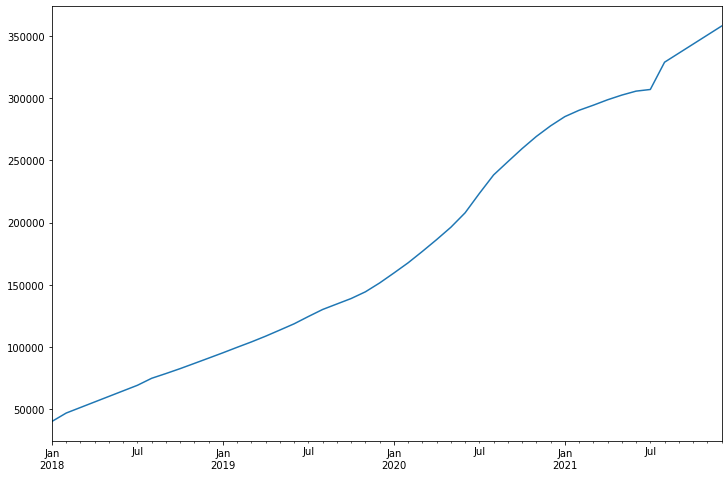

In [17]:
trend_restored.plot(kind='line',figsize=(12,8))

<AxesSubplot:>

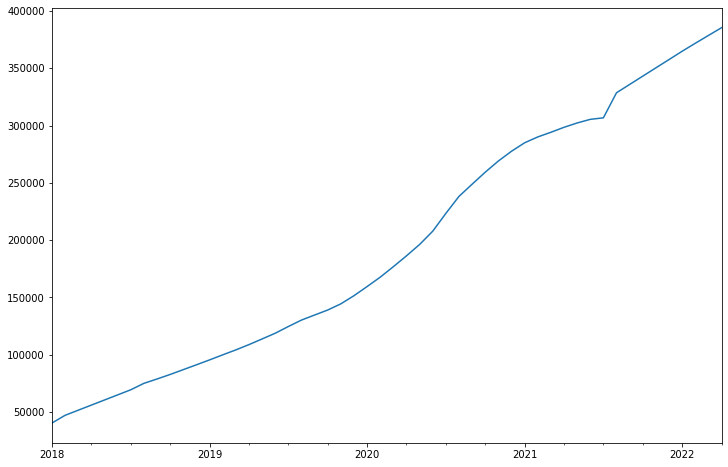

In [18]:
trend_predict_restored.plot(kind='line',figsize=(12,8))

### 录入cube准备工作

In [134]:
#历史时间序列
df_ts=pd.DataFrame(timeseries).reset_index()
df_ts["SA Year"]=df_ts["yearmonth"].dt.year.astype("str")
df_ts["SA Month"]="M"+df_ts["yearmonth"].dt.month.map(lambda x:"{:0>2d}".format(x)).astype("str")
df_ts["Scenario"]="ACT"
df_ts["Version"]="WIP"
df_ts["COA Company"]="Unspecified Comp"
df_ts["Business Unit"]="hangzhou"
df_ts["Product"]="Unspecified Product"
df_ts["Currency"]="No Currency"
df_ts["Region"]="No Country"
df_ts["Channel"]="Unspecified Channel"
df_ts["Customer"]="No Customer"
df_ts["Data Source ZL Product Sales Plan"]="Timeseries"
df_ts["M ZL Product Sales Plan"]="Sales Units"
df_ts.drop('yearmonth',axis=1,inplace=True)
columns=["Scenario","SA Year","SA Month","Version","COA Company","Business Unit","Product","Currency","Region","Channel","Customer","Data Source ZL Product Sales Plan","M ZL Product Sales Plan","Value"]
df_ts=df_ts.reindex(columns=columns)

In [135]:
#预测时间序列
df_ts_pred=pd.DataFrame(predict_seq).reset_index()
df_ts_pred.rename(columns={0:"Value"},inplace=True)
df_ts_pred["SA Year"]=df_ts_pred["index"].dt.year.astype("str")
df_ts_pred["SA Month"]="M"+df_ts_pred["index"].dt.month.map(lambda x:"{:0>2d}".format(x)).astype("str")
df_ts_pred["Scenario"]="ACT"
df_ts_pred["Version"]="WIP"
df_ts_pred["COA Company"]="Unspecified Comp"
df_ts_pred["Business Unit"]="hangzhou"
df_ts_pred["Product"]="Unspecified Product"
df_ts_pred["Currency"]="No Currency"
df_ts_pred["Region"]="No Country"
df_ts_pred["Channel"]="Unspecified Channel"
df_ts_pred["Customer"]="No Customer"
df_ts_pred["Data Source ZL Product Sales Plan"]="Timeseries_predict"
df_ts_pred["M ZL Product Sales Plan"]="Sales Units"
df_ts_pred.drop('index',axis=1,inplace=True)
columns=["Scenario","SA Year","SA Month","Version","COA Company","Business Unit","Product","Currency","Region","Channel","Customer","Data Source ZL Product Sales Plan","M ZL Product Sales Plan","Value"]
df_ts_pred=df_ts_pred.reindex(columns=columns)

In [130]:
#历史周期性数据
df_season=pd.DataFrame(seasonal).reset_index()
df_season.rename(columns={'seasonal':"Value"},inplace=True)
df_season["SA Year"]=df_season["yearmonth"].dt.year.astype("str")
df_season["SA Month"]="M"+df_season["yearmonth"].dt.month.map(lambda x:"{:0>2d}".format(x)).astype("str")
df_season["Scenario"]="ACT"
df_season["Version"]="WIP"
df_season["COA Company"]="Unspecified Comp"
df_season["Business Unit"]="hangzhou"
df_season["Product"]="Unspecified Product"
df_season["Currency"]="No Currency"
df_season["Region"]="No Country"
df_season["Channel"]="Unspecified Channel"
df_season["Customer"]="No Customer"
df_season["Data Source ZL Product Sales Plan"]="Timeseries_seasonality"
df_season["M ZL Product Sales Plan"]="Sales Units"
df_season.drop('yearmonth',axis=1,inplace=True)
columns=["Scenario","SA Year","SA Month","Version","COA Company","Business Unit","Product","Currency","Region","Channel","Customer","Data Source ZL Product Sales Plan","M ZL Product Sales Plan","Value"]
df_season=df_season.reindex(columns=columns)

### 连接Tm1

In [128]:
from TM1py.Services import TM1Service
from TM1py.Utils import Utils
tm1 = TM1Service(address="192.168.0.176", port=30015, ssl=False, user="neil", password="123")

### 录入Tm1 (Timeseries)

In [136]:
 #clear
mdx_tgr='''
        SELECT 
           {[SA Month].[SA Month].Members}
           ON ROWS,
           {[SA Year].[SA Year].Members}
          ON COLUMNS
        FROM [ZL Product Sales Plan] 
        WHERE 
          (
           [Scenario].[Scenario].[ACT],
           [Version].[Version].[WIP],
           [COA Company].[COA Company].[Unspecified Comp],
           [Customer].[Customer].[No Customer],
           [Product].[Product].[Unspecified Product],
           [Region].[Region].[No Country],
           [Data Source ZL Product Sales Plan].[Data Source ZL Product Sales Plan].[Timeseries],
           [Currency].[Currency].[No Currency],
           [M ZL Product Sales Plan].[M ZL Product Sales Plan].[Sales Units],
           [Business Unit].[Business Unit].[hangzhou],
           [Channel].[Channel].[Unspecified Channel]
  )
             '''
tm1.cells.clear_with_mdx("ZL Product Sales Plan",mdx_tgr)
#Writing to tgr Cube
tm1.cells.write_dataframe(
        cube_name="ZL Product Sales Plan",
        data=df_ts,
        dimensions=["Scenario","SA Year","SA Month","Version","COA Company","Business Unit","Product","Currency"
                    ,"Region","Channel","Customer","Data Source ZL Product Sales Plan","M ZL Product Sales Plan"],
        increment=True,
        deactivate_transaction_log=True,
        reactivate_transaction_log=True,
        sandbox_name=None,
        use_ti=True,
        skip_non_updateable=False,
        use_changeset=False)

### 录入Tm1 (Timeseries_pred)

In [137]:
 #clear
mdx_tgr='''
        SELECT 
           {[SA Month].[SA Month].Members}
           ON ROWS,
           {[SA Year].[SA Year].Members}
          ON COLUMNS
        FROM [ZL Product Sales Plan] 
        WHERE 
          (
           [Scenario].[Scenario].[ACT],
           [Version].[Version].[WIP],
           [COA Company].[COA Company].[Unspecified Comp],
           [Customer].[Customer].[No Customer],
           [Product].[Product].[Unspecified Product],
           [Region].[Region].[No Country],
           [Data Source ZL Product Sales Plan].[Data Source ZL Product Sales Plan].[Timeseries_predict],
           [Currency].[Currency].[No Currency],
           [M ZL Product Sales Plan].[M ZL Product Sales Plan].[Sales Units],
           [Business Unit].[Business Unit].[hangzhou],
           [Channel].[Channel].[Unspecified Channel]
  )
             '''
tm1.cells.clear_with_mdx("ZL Product Sales Plan",mdx_tgr)
#Writing to tgr Cube
tm1.cells.write_dataframe(
        cube_name="ZL Product Sales Plan",
        data=df_ts_pred,
        dimensions=["Scenario","SA Year","SA Month","Version","COA Company","Business Unit","Product","Currency"
                    ,"Region","Channel","Customer","Data Source ZL Product Sales Plan","M ZL Product Sales Plan"],
        increment=True,
        deactivate_transaction_log=True,
        reactivate_transaction_log=True,
        sandbox_name=None,
        use_ti=True,
        skip_non_updateable=False,
        use_changeset=False)

### 录入Tm1 (seasonality)

In [132]:
 #clear
mdx_tgr='''
        SELECT 
           {[SA Month].[SA Month].Members}
           ON ROWS,
           {[SA Year].[SA Year].Members}
          ON COLUMNS
        FROM [ZL Product Sales Plan] 
        WHERE 
          (
           [Scenario].[Scenario].[ACT],
           [Version].[Version].[WIP],
           [COA Company].[COA Company].[Unspecified Comp],
           [Customer].[Customer].[No Customer],
           [Product].[Product].[Unspecified Product],
           [Region].[Region].[No Country],
           [Data Source ZL Product Sales Plan].[Data Source ZL Product Sales Plan].[Timeseries_seasonality],
           [Currency].[Currency].[No Currency],
           [M ZL Product Sales Plan].[M ZL Product Sales Plan].[Sales Units],
           [Business Unit].[Business Unit].[hangzhou],
           [Channel].[Channel].[Unspecified Channel]
  )
             '''
tm1.cells.clear_with_mdx("ZL Product Sales Plan",mdx_tgr)
#Writing to tgr Cube
tm1.cells.write_dataframe(
        cube_name="ZL Product Sales Plan",
        data=df_season,
        dimensions=["Scenario","SA Year","SA Month","Version","COA Company","Business Unit","Product","Currency"
                    ,"Region","Channel","Customer","Data Source ZL Product Sales Plan","M ZL Product Sales Plan"],
        increment=True,
        deactivate_transaction_log=True,
        reactivate_transaction_log=True,
        sandbox_name=None,
        use_ti=True,
        skip_non_updateable=False,
        use_changeset=False)

### 新版本Stats

In [142]:
import statsmodels.api as sm
def ARIMA_Model(timeseries, order):
    model = sm.tsa.arima.ARIMA(timeseries, order=(order[0],0,order[1]))
    model=model.fit()
    return model

#动态start时间
start_time=pd.Series(timeseries.index[1]).astype("str")[0]

trend_diff1_model = ARIMA_Model(trend_diff1, trend_diff1_evaluate.bic_min_order)
trend_diff1_fit_seq = trend_diff1_model.fittedvalues
#差分拟合还原
trend_restored = pd.Series([trend[0]], index=[trend.index[0]]) .append(trend_diff1_fit_seq).cumsum()
trend_diff1_predict_seq = trend_diff1_model.predict(start=start_time, end="2022-04-01", dynamic=False)
#差分预测还原
trend_predict_restored = pd.Series([trend[0]], index=[trend.index[0]]) .append(trend_diff1_predict_seq).cumsum()

resid_diff1_model = ARIMA_Model(resid_diff1, resid_diff1_evaluate.bic_min_order)
resid_diff1_fit_seq = resid_diff1_model.fittedvalues
#差分拟合还原
resid_restored = pd.Series([residual[0]], index=[residual.index[0]]) .append(resid_diff1_fit_seq).cumsum()
resid_diff1_predict_seq = resid_diff1_model.predict(start=start_time ,end="2022-04-01", dynamic=False)
#差分预测还原
resid_predict_restored = pd.Series([residual[0]], index=[residual.index[0]]) .append(resid_diff1_predict_seq).cumsum()


#拟合训练集
# 拟合训练集
fit_seq = seasonal.add(trend_restored, fill_value=0)
fit_seq = fit_seq.add(resid_restored, fill_value=0)





#预测集
seasonal_expand=pd.Series(seasonal["2021-01-01":"2021-12-01"].to_list(),index=pd.date_range("2022-01-01",periods=12,freq="MS"))
seasonal_fcst=seasonal
seasonal_fcst.append(seasonal_expand)
predict_seq=seasonal_fcst["2018-01-01":"2022-04-01"].add(trend_predict_restored,fill_value=0)
predict_seq=predict_seq.add(resid_predict_restored,fill_value=0)


C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [147]:
predict_seq

2018-01-01     40307.431616
2018-02-01     47108.995550
2018-03-01     51604.455385
2018-04-01     56100.042636
2018-05-01     60595.862069
2018-06-01     65091.100441
2018-07-01     69586.509225
2018-08-01     75248.567554
2018-09-01     79087.860282
2018-10-01     83083.228869
2018-11-01     87327.638521
2018-12-01     91601.813423
2019-01-01     95904.527854
2019-02-01    100359.629464
2019-03-01    104708.209042
2019-04-01    109366.221188
2019-05-01    114344.854916
2019-06-01    119380.691061
2019-07-01    125273.601169
2019-08-01    130948.602138
2019-09-01    135392.549910
2019-10-01    139820.604093
2019-11-01    145234.456865
2019-12-01    152388.792935
2020-01-01    160403.096474
2020-02-01    168645.014740
2020-03-01    177829.162943
2020-04-01    187334.155041
2020-05-01    197295.868801
2020-06-01    208924.254742
2020-07-01    224500.076845
2020-08-01    239399.319818
2020-09-01    250072.399280
2020-10-01    260609.584495
2020-11-01    270407.676947
2020-12-01    278958